# 0. Lendo Arquivo

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [2]:
df = pd.read_csv( 'radiomic_data.csv' )
df.shape

(2587, 116)

# 1. Pré-processamento da base de dados

## 1.1 Quantidade de Classes

In [3]:
# Quantas ocorrências de cada classe
contagens = df[ df.columns[ -1 ] ].value_counts()
print( contagens )

class
BENIGN                     1100
MALIGNANT                   918
BENIGN_WITHOUT_CALLBACK     569
Name: count, dtype: int64


### 1.1.1 Removendo a classe extra

Como na especificação foi comentado que existem duas classes, sendo elas BENIGN e MALIGNANT, é necessário remover as instâncias da classe BENIGN_WITHOUT_CALLBACK.

In [4]:
# Nome da coluna alvo
target_column_name = df.columns[ -1 ]

X = df.drop( columns = target_column_name )
y = df[ target_column_name ]

mask = y != 'BENIGN_WITHOUT_CALLBACK'
X_bin = X[ mask ]
y_bin = y[ mask ]

df = pd.concat( [ X_bin, y_bin ], axis = 1 )
df.shape

(2018, 116)

## 1.2 Valores Ausentes

### 1.2.1 Ver se há algum valor ausente no DataFrame

Retorna `True` se houver pelo menos um valor ausente.

In [5]:
df.isnull().values.any()

np.False_

### 1.2.2 Contar quantos valores ausentes há em cada coluna

In [6]:
df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
class                               0
Length: 116, dtype: int64

### 1.2.3 Exibir linhas que possuem valores ausentes

In [7]:
df[ df.isnull().any( axis = 1 ) ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há valores ausentes na base de dados.**

## 1.3 Valores Duplicados

### 1.3.1 Ver se há alguma linha duplicada

Retorna `True` se houver ao menos uma linha duplicada

In [8]:
df.duplicated().any()

np.False_

### 1.3.2 Contar o número de linhas duplicadas

In [9]:
df.duplicated().sum()

np.int64(0)

### 1.3.3 Ver quais são as linhas duplicadas

In [10]:
df[ df.duplicated() ]

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class


**Resultado: não há linhas duplicadas na base de dados.**

## 1.4 Redução de Dimensionalidade

### 1.4.1 Remover colunas manualmente

Algumas colunas na base de dados são sobre versões de bibliotecas, tamanho das imagens e algumas outras coisas.

In [11]:
columns_to_drop: list[ str ] = [ 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
                                 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
                                 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
                                 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash',
                                 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
                                 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean',
                                 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_BoundingBox',
                                 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum',
                                 'diagnostics_Mask-original_CenterOfMassIndex',
                                 'diagnostics_Mask-original_CenterOfMass' ]

### 1.4.2 Colunas com valores únicos

Algumas colunas da base de dados são preenchidas com um único valor, o que não ajuda muito.

In [12]:
# Conta valores únicos em cada coluna
unique_counts = df.nunique()

# Seleciona nomes de colunas constantes
constant_columns = unique_counts[ unique_counts == 1 ].index.tolist()

# Unificando as listas de colunas que serão removidas
columns_to_drop.extend( constant_columns )

df = df.drop( columns = columns_to_drop )
df.shape

(2018, 93)

### 1.4.3 Seleção Baseada em Informação Mútua (Mutual Information)

Aqui será utilizada uma técnica de seleção de variáveis baseada em informação mútua, que mede a dependência estatística entre cada variável e a variável alvo. O objetivo é identificar quais variáveis carregam mais informação relevante para prever o resultado.

In [18]:
try:
    # Verifica se y_encoded já existe de passos anteriores
    y_encoded
    print( "Variável 'y_encoded' já existe." )
except NameError:
    print( "Codificando a variável alvo 'y'..." )
    if 'y' in locals() or 'y' in globals():
        le = LabelEncoder()
        y_encoded = le.fit_transform( y )
        print( "Variável 'y_encoded' criada." )
    else:
        print( "ERRO: Variável 'y' não definida. Defina 'y' antes de prosseguir." )
        # Pare a execução ou trate o erro conforme necessário

# Defina o número de features que você quer manter (valor K)
k_features_mi = 30

# Crie a instância do seletor SelectKBest
#    - score_func=mutual_info_classif: Especifica que usaremos MI para pontuar as features.
#    - k=k_features_mi: Indica quantas features com maior score serão selecionadas.
mi_selector = SelectKBest( score_func = mutual_info_classif, k = k_features_mi )


Codificando a variável alvo 'y'...
Variável 'y_encoded' criada.


### 1.4.4 Seleção Baseada em Modelos de Árvore

Será treinado um modelo de floresta aleatória completo com todas as variáveis disponíveis. Após o treinamento, serão extraídas as importâncias atribuídas a cada variável. Em seguida, será aplicado um filtro automático que seleciona apenas as variáveis mais relevantes, com base em um critério quantitativo de corte.

In [19]:
try:
    X
    y_encoded
except NameError:
    print( "ERRO: 'X_numeric' ou 'y_encoded' não definidos. Execute as etapas anteriores primeiro." )

# Defina o limiar para seleção de features
threshold_rf = "median"

# Crie uma instância do estimador que será usado para calcular a importância
rf_estimator_for_selection = RandomForestClassifier(
        n_estimators = 50,
        random_state = 42,
        n_jobs = -1,
)

# Crie a instância do seletor SelectFromModel
rf_importance_selector = SelectFromModel(
        estimator = rf_estimator_for_selection,
        threshold = threshold_rf,
        prefit = False
)

Usando 'X_numeric' e 'y_encoded' existentes.


### 1.4.5 Eliminação Recursiva de Atributos

Será aplicado um processo automático que, a cada rodada, elimina uma variável de entrada e avalia como isso afeta a capacidade do modelo de previsão. Ao final, identifica o conjunto de variáveis que oferece o melhor desempenho.

In [20]:
try:
    X
    y_encoded
    print( "Usando 'X' e 'y_encoded' existentes." )
except NameError:
    print( "ERRO: 'X' ou 'y_encoded' não definidos. Execute as etapas anteriores primeiro." )

print( "\nDividindo os dados em Conjunto de Treino e Conjunto de Teste..." )
try:
    X_train, X_test, y_train, y_test = train_test_split(
            X,
            y_encoded,
            test_size = 0.25,
            random_state = 42,
            stratify = y_encoded
    )
    print( f"Divisão Concluída:" )
    print( f"  - Treino: {X_train.shape[ 0 ]} amostras, {X_train.shape[ 1 ]} features" )
    print( f"  - Teste:  {X_test.shape[ 0 ]} amostras, {X_test.shape[ 1 ]} features" )
    print( "\nIMPORTANTE: O conjunto de Teste (X_test, y_test) NÃO será usado até a avaliação final." )
    print( "Toda a otimização (RFECV) e validação cruzada (cross_val_score) ocorrerá APENAS em (X_train, y_train)." )

except ValueError as e:
    print( f"ERRO ao dividir os dados: {e}. Verifique o tamanho dos dados e o parâmetro stratify." )
    # exit()
except NameError:
    print( "ERRO: 'X' ou 'y_encoded' não definidos antes da divisão." )
    # exit()


Usando 'X_numeric' e 'y_encoded' existentes.

Dividindo os dados em Conjunto de Treino e Conjunto de Teste...
Divisão Concluída:
  - Treino: 1513 amostras, 92 features
  - Teste:  505 amostras, 92 features

IMPORTANTE: O conjunto de Teste (X_test, y_test) NÃO será usado até a avaliação final.
Toda a otimização (RFECV) e validação cruzada (cross_val_score) ocorrerá APENAS em (X_train, y_train).


In [21]:
# Estimador para o RFECV (pode ser o mesmo que usaremos no RFE depois)
estimator_for_cv = RandomForestClassifier(
        n_estimators = 50, random_state = 42, class_weight = 'balanced', n_jobs = -1
)

cv_strategy_rfe = StratifiedKFold( n_splits = 10, shuffle = True, random_state = 42 )

# Escalonar os dados de TREINO *antes* de passar para o RFECV
scaler_rfecv = StandardScaler()
X_train_scaled_for_rfecv = scaler_rfecv.fit_transform( X_train )  # Fit APENAS no treino

# Instanciar e rodar RFECV
rfecv_selector = RFECV(
        estimator = estimator_for_cv,
        step = 1,
        cv = cv_strategy_rfe,
        scoring = 'accuracy',
        min_features_to_select = max( 1, X_train.shape[ 1 ] // 10 ),
        n_jobs = -1,
)
rfecv_selector.fit( X_train_scaled_for_rfecv, y_train )

# Obter o número ótimo de features encontrado
n_features_rfe = rfecv_selector.n_features_
print( f"RFECV (no treino) determinou n_features_to_select = {n_features_rfe}" )

# Validar o número (precaução)
if n_features_rfe > X_train.shape[ 1 ]: n_features_rfe = X_train.shape[ 1 ]
if n_features_rfe <= 0: n_features_rfe = 1

# Criar a instância do estimador para o RFE (que será usado no Pipeline)
estimator_for_rfe = RandomForestClassifier(
        n_estimators = 50, random_state = 42, n_jobs = -1, class_weight = 'balanced'
)
print( f"\nCriado estimador interno ('estimator_for_rfe') para o RFE." )

# Criar a instância do seletor RFE final
rfe_selector = RFE(
        estimator = estimator_for_rfe,
        n_features_to_select = n_features_rfe,
        step = 1
)



Executando RFECV APENAS no Conjunto de Treino para encontrar n_features...
RFECV (no treino) determinou n_features_to_select = 26

Criado estimador interno ('estimator_for_rfe') para o RFE.


### 1.4.6 Análise de Componentes Principais (PCA)

Será aplicada uma técnica que transforma as variáveis originais em um novo conjunto de variáveis não correlacionadas — os componentes principais — que retêm o máximo possível da variabilidade dos dados originais. O número de componentes será definido automaticamente com base em um critério de variância explicada.

Usando 'X_train', 'y_train', 'X_test', 'y_test' existentes.

--- Configurando Componentes para PCA ---
Método PCA: Reter 95% da variância.

(Opcional) Iniciando análise de variância explicada pelo PCA (APENAS no treino)...
--> Análise no Treino: 11 componentes necessários para >= 95% da variância.


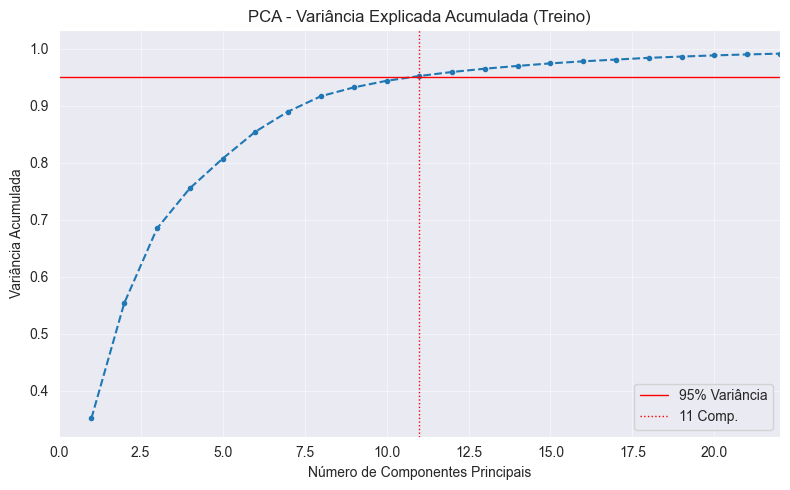

In [22]:
try:
    X_train
    y_train
    X_test
    y_test
    print( "Usando 'X_train', 'y_train', 'X_test', 'y_test' existentes." )
except NameError:
    print( "ERRO: Conjuntos de treino/teste não definidos. Execute a divisão `train_test_split` primeiro." )

print( "\n--- Configurando Componentes para PCA ---" )

# Definir o método para escolher n_components
variance_threshold = 0.95
n_components_pca = variance_threshold
print( f"Método PCA: Reter {n_components_pca:.0%} da variância." )

# Analisar a variância no treino
try:
    # Usaremos um pipeline temporário SÓ para esta análise
    pipeline_pca_analysis = Pipeline(
            [
                ('scaler', StandardScaler()),
                ('pca', PCA( random_state = 42 ))  # PCA com todos componentes
            ] )
    pipeline_pca_analysis.fit( X_train, y_train )

    pca_fitted_analysis = pipeline_pca_analysis.named_steps[ 'pca' ]
    cumulative_variance = np.cumsum( pca_fitted_analysis.explained_variance_ratio_ )
    n_comp_needed_train = np.argmax( cumulative_variance >= variance_threshold ) + 1

    print(
            f"--> Análise no Treino: {n_comp_needed_train} componentes necessários para >= {variance_threshold:.0%} da variância." )

    # Plotar
    plt.figure( figsize = (8, 5) )
    plt.plot( range( 1, len( cumulative_variance ) + 1 ), cumulative_variance, marker = '.', linestyle = '--' )
    plt.title( f'PCA - Variância Explicada Acumulada (Treino)' )
    plt.xlabel( 'Número de Componentes Principais' )
    plt.ylabel( 'Variância Acumulada' )
    plt.axhline(
            y = variance_threshold, color = 'r', linestyle = '-', lw = 1,
            label = f'{variance_threshold:.0%} Variância' )
    plt.axvline( x = n_comp_needed_train, color = 'r', linestyle = ':', lw = 1, label = f'{n_comp_needed_train} Comp.' )
    plt.xlim( 0, min( len( cumulative_variance ) + 1, n_comp_needed_train * 2 if n_comp_needed_train > 10 else 100 ) )
    plt.grid( True, alpha = 0.5 )
    plt.legend( loc = 'best' )
    plt.tight_layout()
    plt.show()
    del pipeline_pca_analysis

except Exception as e:
    print( f"Erro durante análise opcional de variância PCA no treino: {e}" )

# Instância do Scaler que precederá o PCA no pipeline final:
scaler_for_pca_pipeline = StandardScaler()

# Instância do PCA configurada com o threshold de variância:
pca_transformer_pipeline = PCA( n_components = n_components_pca, random_state = 42 )

### 1.4.7 Análise Discriminante Linear (LDA)

Será aplicada a técnica de Análise Discriminante Linear sobre os dados escalados. O objetivo principal é encontrar um novo espaço de menor dimensão no qual as classes sejam mais facilmente separáveis. Isso é feito projetando os dados sobre eixos que maximizam a separação entre as classes com base em variância entre e dentro das classes.

Usando 'X_train', 'y_train', 'X_test', 'y_test' existentes.

--- Configurando Componentes para LDA ---
Número de features no treino: 92
Número de classes únicas no treino: 2
--> LDA será configurado com n_components = 1

(Opcional) Verificando a variância explicada pelos componentes LDA (APENAS no treino)...
--> Razão da variância (separabilidade) explicada pelos 1 componentes LDA no treino:
    LD1: 1.0000
    Total: 1.0000


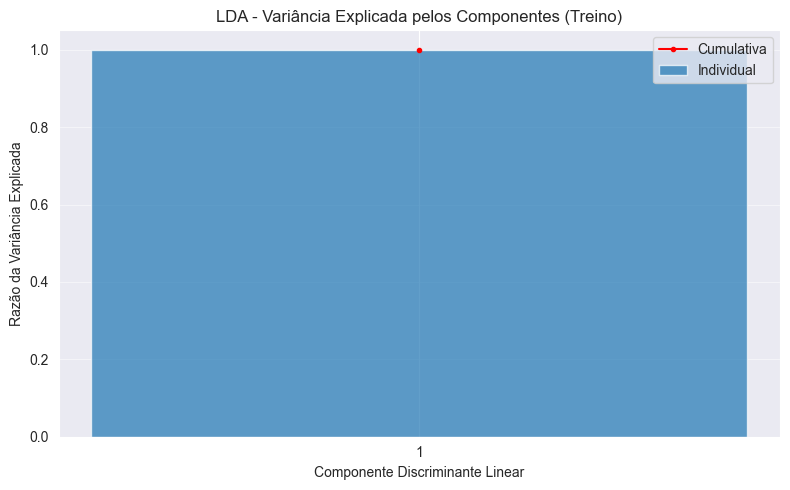

In [23]:
try:
    X_train
    y_train
    X_test
    y_test
    print( "Usando 'X_train', 'y_train', 'X_test', 'y_test' existentes." )
except NameError:
    print( "ERRO: Conjuntos de treino/teste não definidos. Execute a divisão `train_test_split` primeiro." )

# Determinar n_components para LDA
n_components_lda = None
try:
    n_features_train = X_train.shape[ 1 ]
    # Garante que estamos pegando as classes únicas do CONJUNTO DE TREINO
    unique_classes_train = np.unique( y_train )
    n_classes_train = len( unique_classes_train )

    print( f"Número de features no treino: {n_features_train}" )
    print( f"Número de classes únicas no treino: {n_classes_train}" )

    if n_classes_train < 2:
        print( "ERRO: LDA requer pelo menos 2 classes no conjunto de treino 'y_train'." )
    else:
        # Calcular o número máximo/recomendado de componentes
        n_components_lda = min( n_features_train, n_classes_train - 1 )
        if n_components_lda <= 0:
            print(
                    f"AVISO: Cálculo resultou em n_components_lda = {n_components_lda}. Verifique features/classes. LDA pode não ser aplicável." )
            # Tratar caso onde n_components é 0 ou negativo (ex: 1 classe ou 0 features)
        else:
            print( f"--> LDA será configurado com n_components = {n_components_lda}" )

except NameError:
    print( "ERRO: 'X_train' ou 'y_train' não definidos." )
except Exception as e:
    print( f"ERRO ao determinar n_components para LDA: {e}" )
    # Tratar erro

# Analisar a variância explicada pelos componentes LDA no treino
# A "variância" no LDA refere-se à capacidade de separação entre classes.
if n_components_lda is not None and n_components_lda > 0:  # Prosseguir apenas se n_components for válido
    try:

        # Pipeline temporário para análise
        pipeline_lda_analysis = Pipeline(
                [
                    ('scaler', StandardScaler()),
                    ('lda', LinearDiscriminantAnalysis( n_components = n_components_lda ))
                ] )
        # Ajustar ao treino (LDA usa y_train)
        pipeline_lda_analysis.fit( X_train, y_train )

        lda_fitted_analysis = pipeline_lda_analysis.named_steps[ 'lda' ]
        explained_variance_ratio_lda = lda_fitted_analysis.explained_variance_ratio_

        print(
                f"--> Razão da variância (separabilidade) explicada pelos {n_components_lda} componentes LDA no treino:" )
        for i, ratio in enumerate( explained_variance_ratio_lda ):
            print( f"    LD{i + 1}: {ratio:.4f}" )
        print( f"    Total: {np.sum( explained_variance_ratio_lda ):.4f}" )

        # Plotar
        plt.figure( figsize = (8, 5) )
        component_indices = range( 1, n_components_lda + 1 )
        plt.bar( component_indices, explained_variance_ratio_lda, alpha = 0.7, label = 'Individual' )
        plt.plot(
                component_indices, np.cumsum( explained_variance_ratio_lda ), marker = '.', linestyle = '-',
                color = 'r',
                label = 'Cumulativa' )
        plt.title( 'LDA - Variância Explicada pelos Componentes (Treino)' )
        plt.xlabel( 'Componente Discriminante Linear' )
        plt.ylabel( 'Razão da Variância Explicada' )
        plt.xticks( component_indices )
        plt.ylim( 0, 1.05 )
        plt.grid( True, axis = 'y', alpha = 0.5 )
        plt.legend( loc = 'best' )
        plt.tight_layout()
        plt.show()
        del pipeline_lda_analysis

    except Exception as e:
        print( f"Erro durante análise opcional de variância LDA no treino: {e}" )
else:
    print( "\nAnálise de variância LDA pulada (n_components inválido ou <= 0)." )

lda_transformer_pipeline = None  # Inicializa como None
scaler_for_lda_pipeline = StandardScaler()  # Scaler sempre pode ser criado

if n_components_lda is not None and n_components_lda > 0:
    # Instância do LDA:
    lda_transformer_pipeline = LinearDiscriminantAnalysis( n_components = n_components_lda )
else:
    print( "\n--- Configuração LDA Incompleta ---" )
    print( "ERRO: Não foi possível criar a instância do LDA transformer devido a problema com n_components." )
    print( "Verifique o número de classes (>=2) e features no conjunto de treino." )
    print( "O pipeline usando LDA não poderá ser construído." )

## 1.5 Impacto na Dimensionalidade

### 1.5.1 **Avaliação Comparativa dos Pipelines**

Nesta seção, vamos montar os pipelines completos combinando cada técnica de redução de dimensionalidade configurada anteriormente com cada um dos classificadores base. Em seguida, avaliaremos o desempenho de cada pipeline usando validação cruzada (Stratified K-Fold com 10 splits) no conjunto de **treino** (`X_train`, `y_train`). O objetivo é identificar as combinações mais promissoras antes de realizar a avaliação final no conjunto de teste.

In [32]:
# Verificar se os dados de treino e os componentes existem
try:
    X_train
    y_train
    mi_selector  # Adicione verificações para todos os componentes necessários
    rf_importance_selector
    rfe_selector
    scaler_for_pca_pipeline
    pca_transformer_pipeline
    scaler_for_lda_pipeline
    # lda_transformer_pipeline pode não existir, será checado depois
    print( "Variáveis de dados e componentes de redução encontrados." )
except NameError as e:
    print( f"ERRO FATAL: Variável pré-requisito não definida - {e}. Execute as células anteriores." )
    raise e  # Levanta o erro para parar o notebook

Variáveis de dados e componentes de redução encontrados.


### 1.5.2 Definir Classificadores Base

Primeiro, definimos instâncias dos modelos de classificação que queremos testar. Usamos `random_state` para reprodutibilidade.

In [33]:
classifiers = {
    "Logistic Regression": LogisticRegression(
            random_state = 42, max_iter = 1000, solver = 'liblinear', class_weight = 'balanced' ),
    "Random Forest": RandomForestClassifier(
            random_state = 42, n_estimators = 100, class_weight = 'balanced', n_jobs = -1 ),
    "SVC": SVC( random_state = 42, probability = True, class_weight = 'balanced' ),  # probability=True para roc_auc
    "Decision Tree": DecisionTreeClassifier( random_state = 42, class_weight = 'balanced' ),
    "MLP": MLPClassifier( random_state = 42, max_iter = 500, hidden_layer_sizes = (100,), early_stopping = True )
}
print( f"Classificadores definidos: {list( classifiers.keys() )}" )


--- 1. Definindo Classificadores Base ---
Classificadores definidos: ['Logistic Regression', 'Random Forest', 'SVC', 'Decision Tree', 'MLP']


### 1.5.3. Montar os Pipelines Completos

Agora, criamos os pipelines completos. Cada pipeline combinará:
1.  Etapas de pré-processamento/redução (ex: Scaler + PCA, ou Scaler + SelectKBest).
2.  Um Scaler *após* a redução, se o classificador for sensível à escala (LogReg, SVC, MLP) e a etapa anterior não for um scaler.
3.  O classificador final.

Iteramos sobre todas as técnicas de redução configuradas e todos os classificadores base.

In [34]:
pipelines_to_evaluate = { }

# Estratégias de redução e seus componentes pré-configurados
reduction_methods = {
    "Baseline": [ ],  # Sem redução explícita
    "MI": [ ('scaler', StandardScaler()), ('selector', mi_selector) ],
    "RF_Select": [ ('scaler', StandardScaler()), ('selector', rf_importance_selector) ],
    "RFE": [ ('scaler', StandardScaler()), ('selector', rfe_selector) ],
    "PCA": [ ('scaler', scaler_for_pca_pipeline), ('transformer', pca_transformer_pipeline) ],
    "LDA": [ ]
}

# Adicionar LDA apenas se foi criado com sucesso na etapa anterior
if 'lda_transformer_pipeline' in locals() and lda_transformer_pipeline is not None:
    reduction_methods[ "LDA" ] = [ ('scaler', scaler_for_lda_pipeline), ('transformer', lda_transformer_pipeline) ]
    print( "Info: LDA será incluído na avaliação." )
else:
    print( "Info: LDA não foi configurado ou falhou, será pulado." )

# Loop para montar os pipelines
for reduction_name, reduction_steps in reduction_methods.items():
    for clf_name, classifier in classifiers.items():
        pipeline_name = f"{reduction_name}-{clf_name}"
        pipeline_steps = [ ]
        pipeline_steps.extend( reduction_steps )  # Adiciona etapas de redução/transformação

        # Adicionar scaler APÓS redução/transformação se necessário para o classificador
        needs_scaling = clf_name in [ "Logistic Regression", "SVC", "MLP" ]
        is_baseline = reduction_name == "Baseline"

        if needs_scaling:
            if not is_baseline:
                # Adiciona scaler depois da redução/transformação para modelos sensíveis
                pipeline_steps.append( (f'scaler_after_{reduction_name.lower()}', StandardScaler()) )
            else:
                # Adiciona scaler para o Baseline se o modelo for sensível
                pipeline_steps.append( ('scaler_baseline', StandardScaler()) )

        # Adicionar o classificador
        pipeline_steps.append( ('classifier', classifier) )

        # Criar e armazenar
        final_pipeline = Pipeline( steps = pipeline_steps )
        pipelines_to_evaluate[ pipeline_name ] = final_pipeline

print( f"\nTotal de {len( pipelines_to_evaluate )} pipelines montados." )


--- 2. Montando Pipelines ---
Info: LDA será incluído na avaliação.

Total de 30 pipelines montados.


### 1.5.4 Definir Estratégia de Validação Cruzada e Métricas

Configuramos o `StratifiedKFold` com 10 splits para a validação cruzada, garantindo a proporção das classes em cada fold. Definimos também as métricas que queremos calcular (Accuracy, F1-Weighted, ROC AUC).

In [35]:
n_cv_splits = 10
# random_state garante que os splits sejam os mesmos em diferentes execuções
cv_strategy = StratifiedKFold( n_splits = n_cv_splits, shuffle = True, random_state = 42 )

# Dicionário de métricas para avaliação
scoring = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'roc_auc': 'roc_auc'
}
print( f"Estratégia de CV: StratifiedKFold com {n_cv_splits} splits." )
print( f"Métricas: {list( scoring.keys() )}" )


--- 3. Configurando Avaliação ---
Estratégia de CV: StratifiedKFold com 10 splits.
Métricas: ['accuracy', 'f1_weighted', 'roc_auc']


### 1.5.5 Executar Avaliação com Validação Cruzada

Este é o passo principal onde cada pipeline é avaliado usando validação cruzada no conjunto de treino (`X_train`, `y_train`).
- Calculamos as métricas de resumo (Accuracy, F1-Weighted, ROC AUC) usando `cross_val_score` para obter a média e o desvio padrão entre os 10 folds.
- Usamos `cross_val_predict` para obter as previsões de cada amostra (quando estava no fold de teste) e calculamos uma **Matriz de Confusão** agregada para cada pipeline.

**Atenção:** Esta célula pode levar um tempo considerável para executar.

In [29]:
results_list = [ ]
# Dicionário para armazenar as matrizes de confusão separadamente
# confusion_matrices_cv = {}
start_time_total = time.time()

for name, pipeline in pipelines_to_evaluate.items():
    start_time_pipeline = time.time()
    print( f"Avaliando: {name}..." )
    reduction_name_res = name.split( '-' )[ 0 ]
    clf_name_res = name.split( '-' )[ 1 ]

    pipeline_scores = { }
    cm_calculated = False  # Flag para saber se a matriz foi calculada

    # Calcular Métricas de Resumo (Média/Desvio Padrão)
    for metric_name, scorer in scoring.items():
        try:
            scores = cross_val_score(
                    pipeline, X_train, y_train,
                    cv = cv_strategy, scoring = scorer, n_jobs = -1 )
            pipeline_scores[ f'Mean {metric_name}' ] = np.mean( scores )
            pipeline_scores[ f'Std {metric_name}' ] = np.std( scores )
            print( f"  - {metric_name}: {np.mean( scores ):.4f} +/- {np.std( scores ):.4f}" )
        except Exception as e:
            print( f"  - ERRO ao calcular {metric_name} para {name}: {e}" )
            pipeline_scores[ f'Mean {metric_name}' ] = np.nan
            pipeline_scores[ f'Std {metric_name}' ] = np.nan

    # Calcular Matriz de Confusão Agregada via CV
    try:
        print( f"    Calculando predições CV para Matriz de Confusão..." )
        # Obter previsões usando validação cruzada
        y_pred_cv = cross_val_predict( pipeline, X_train, y_train, cv = cv_strategy, n_jobs = -1 )

        # Calcular a matriz de confusão comparando as previsões CV com os rótulos reais do treino
        cm = confusion_matrix( y_train, y_pred_cv )
        print( f"    Matriz de Confusão (CV Agregada):\n{cm}" )
        # Guardar a matriz no dicionário de resultados
        pipeline_scores[ 'Confusion Matrix (CV)' ] = cm
        cm_calculated = True  # Marca que foi calculada

    except Exception as e_cm:
        print( f"    * ERRO ao calcular Matriz de Confusão via cross_val_predict: {e_cm}" )
        pipeline_scores[ 'Confusion Matrix (CV)' ] = None  # Indica falha

    end_time_pipeline = time.time()
    # Adicionar informações do pipeline, tempo e flag da CM
    pipeline_scores.update(
            {
                'Pipeline': name,
                'Reduction': reduction_name_res,
                'Classifier': clf_name_res,
                'Time (s)': end_time_pipeline - start_time_pipeline,
                'CM Calculated': cm_calculated
            } )
    results_list.append( pipeline_scores )
    print( f"  --> Concluído em {end_time_pipeline - start_time_pipeline:.2f}s" )

end_time_total = time.time()
print( f"\nValidação Cruzada TOTAL Concluída em {end_time_total - start_time_total:.2f} segundos." )


--- 4. Iniciando Validação Cruzada (em X_train, y_train) ---
  Avaliando: Baseline-Logistic Regression...
  --> Concluído em 1.85s
  Avaliando: Baseline-Random Forest...
  --> Concluído em 5.18s
  Avaliando: Baseline-SVC...
  --> Concluído em 5.92s
  Avaliando: Baseline-Decision Tree...
  --> Concluído em 1.24s
  Avaliando: Baseline-MLP...
  --> Concluído em 1.30s
  Avaliando: MI-Logistic Regression...
  --> Concluído em 2.77s
  Avaliando: MI-Random Forest...
  --> Concluído em 5.83s
  Avaliando: MI-SVC...
  --> Concluído em 6.21s
  Avaliando: MI-Decision Tree...
  --> Concluído em 3.05s
  Avaliando: MI-MLP...
  --> Concluído em 3.25s
  Avaliando: RF_Select-Logistic Regression...
  --> Concluído em 3.16s
  Avaliando: RF_Select-Random Forest...
  --> Concluído em 6.58s
  Avaliando: RF_Select-SVC...
  --> Concluído em 6.92s
  Avaliando: RF_Select-Decision Tree...
  --> Concluído em 3.51s
  Avaliando: RF_Select-MLP...
  --> Concluído em 4.00s
  Avaliando: RFE-Logistic Regression...
  -->

### 1.5.6 Organizar e Exibir Resultados Tabulares

Compilamos os resultados da validação cruzada em um DataFrame do Pandas. Ordenamos pela acurácia média. A matriz de confusão calculada para cada pipeline foi impressa durante o loop anterior, mas não será exibida diretamente na tabela abaixo para manter a clareza (a coluna `CM Calculated` indica se o cálculo foi bem-sucedido).

In [42]:
if results_list:
    results_df = pd.DataFrame( results_list )

    # Define a ordem desejada das colunas, incluindo 'CM Calculated'
    # Excluindo a coluna da matriz em si ('Confusion Matrix (CV)') da exibição padrão
    cols_order = [ 'Pipeline', 'Reduction', 'Classifier',
                   'Mean accuracy', 'Std accuracy',
                   'Mean f1_weighted', 'Std f1_weighted',
                   'Mean roc_auc', 'Std roc_auc',
                   'CM Calculated', 'Time (s)' ]
    # Filtrar colunas existentes
    cols_order_existing = [ col for col in cols_order if col in results_df.columns ]
    results_df = results_df[ cols_order_existing ]

    # Ordena pela acurácia média
    if 'Mean accuracy' in results_df.columns:
        # Tratar NaNs antes de ordenar para evitar erros em algumas versões do pandas
        results_df[ 'Mean accuracy' ] = pd.to_numeric( results_df[ 'Mean accuracy' ], errors = 'coerce' )
        results_df = results_df.sort_values( by = 'Mean accuracy', ascending = False, na_position = 'last' )
    else:
        print( "AVISO: Coluna 'Mean accuracy' não encontrada para ordenação." )

    print( "\n--- Resultados Consolidados (Ordenados por Acurácia Média no Treino) ---" )
    pd.set_option( 'display.max_rows', 100 )
    pd.set_option( 'display.max_columns', None )
    pd.set_option( 'display.width', 1000 )
    pd.set_option( 'display.float_format', '{:.4f}'.format )

    print( results_df )

else:
    print( "\nERRO: Nenhum resultado foi coletado na lista 'results_list'. Verifique o loop de avaliação." )


--- 5. Organizando Resultados da Validação Cruzada ---

--- Resultados Consolidados (Ordenados por Acurácia Média no Treino) ---
                         Pipeline  Reduction           Classifier  Mean accuracy  Std accuracy  Mean f1_weighted  Std f1_weighted  Mean roc_auc  Std roc_auc  Time (s)
27                        LDA-SVC        LDA                  SVC         0.6358        0.0338            0.6336           0.0347        0.6578       0.0459    5.8862
25        LDA-Logistic Regression        LDA  Logistic Regression         0.6298        0.0342            0.6297           0.0341        0.6762       0.0355    0.8763
29                        LDA-MLP        LDA                  MLP         0.6278        0.0302            0.6134           0.0328        0.6762       0.0355    2.1675
0    Baseline-Logistic Regression   Baseline  Logistic Regression         0.6212        0.0401            0.6219           0.0399        0.6602       0.0439    1.8489
16              RFE-Random Forest  

### 1.5.7 Visualizar Resultados Gráficos

Geramos gráficos de barras para comparar visualmente o desempenho médio (Accuracy, F1-Weighted, ROC AUC) dos diferentes classificadores para cada técnica de redução de dimensionalidade. Isso ajuda a identificar padrões e tendências nos resultados.

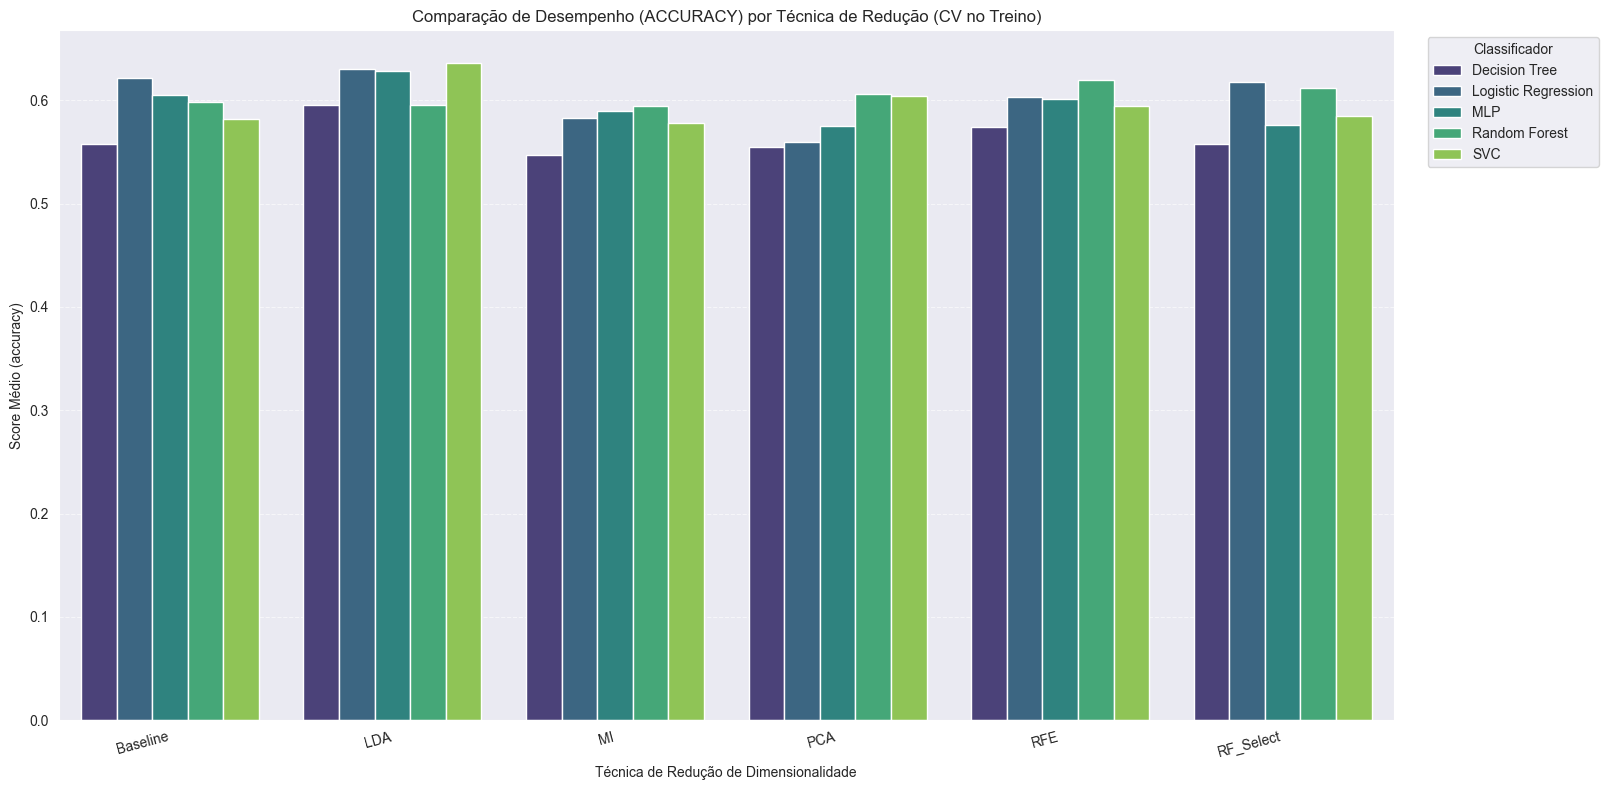

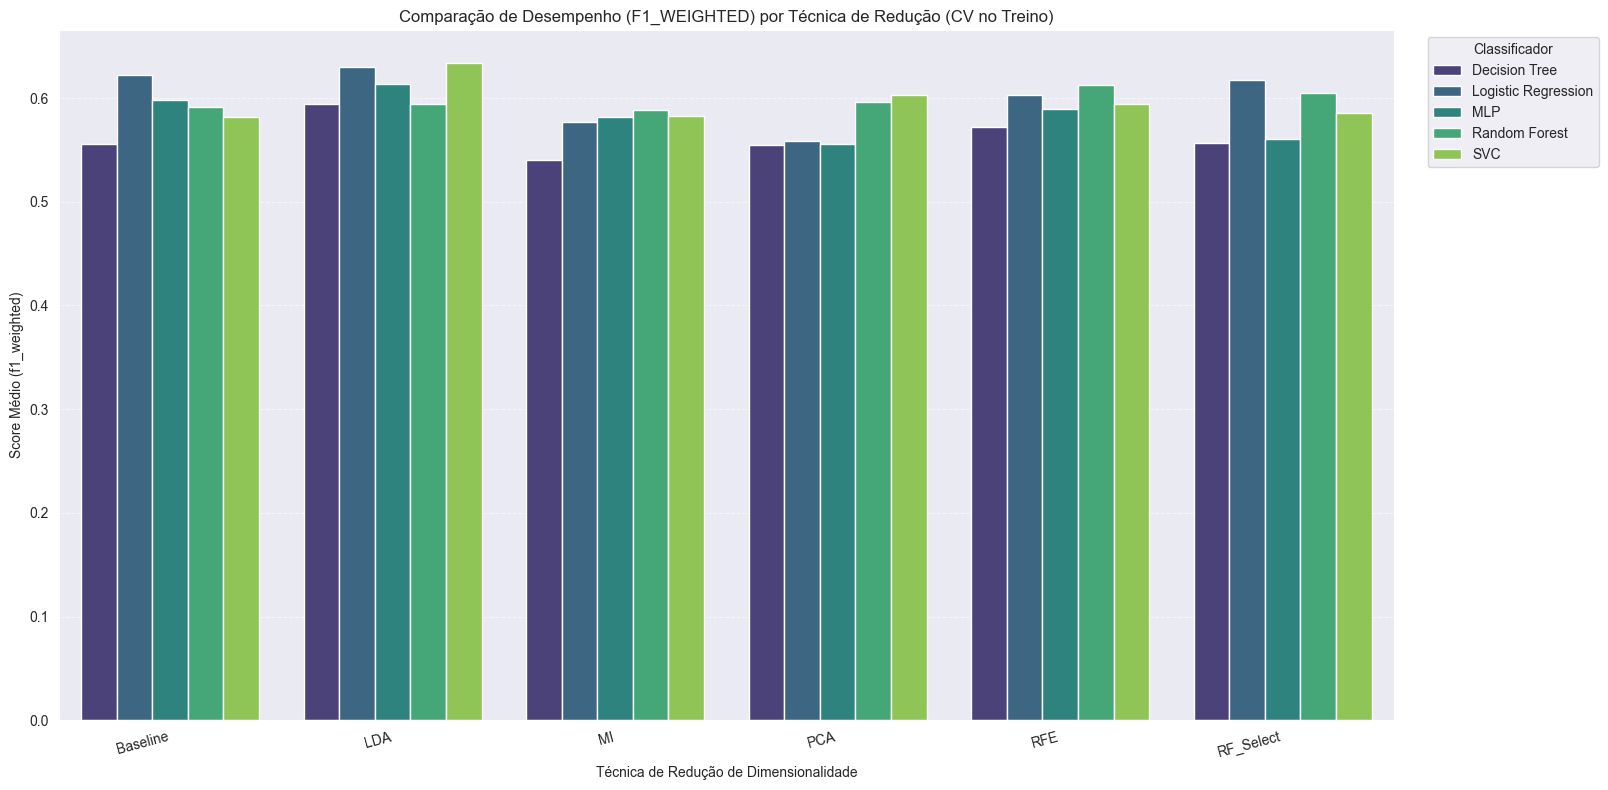

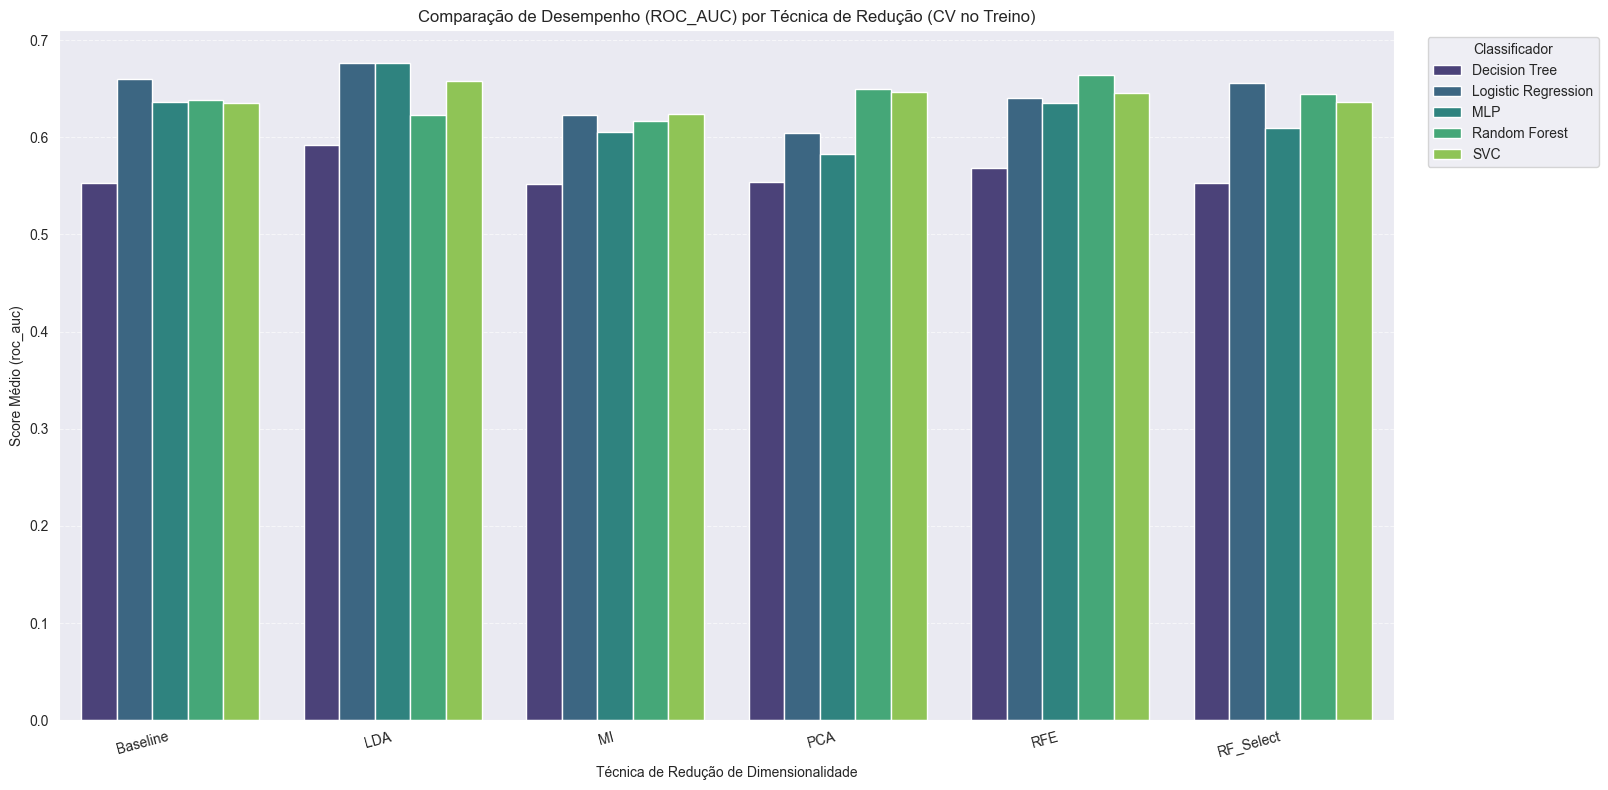

In [43]:
if 'results_df' in locals() and not results_df.empty:
    # Métricas que queremos plotar
    metrics_to_plot = [ 'accuracy', 'f1_weighted', 'roc_auc' ]

    for metric in metrics_to_plot:
        mean_col = f'Mean {metric}'  # Nome da coluna da média
        # Verifica se a coluna da métrica existe nos resultados
        if mean_col not in results_df.columns:
            print( f"\nMétrica '{metric}' não encontrada nos resultados. Pulando plot." )
            continue

        # Remove linhas onde a métrica é NaN (caso tenha ocorrido erro na CV)
        plot_df = results_df.dropna( subset = [ mean_col ] )
        if plot_df.empty:
            print( f"\nSem dados válidos para plotar para a métrica '{metric}'." )
            continue

        # Ordenar por método de redução para o gráfico ficar consistente
        plot_df = plot_df.sort_values( by = [ 'Reduction', 'Classifier' ] )

        plt.figure( figsize = (18, 8) )
        # Cria o gráfico de barras
        sns.barplot(
                data = plot_df,
                x = 'Reduction',  # Agrupa por técnica de redução no eixo X
                y = mean_col,  # Eixo Y é o score médio da métrica
                hue = 'Classifier',  # Barras coloridas por classificador
                palette = 'viridis' )  # Esquema de cores

        plt.title( f'Comparação de Desempenho ({metric.upper()}) por Técnica de Redução (CV no Treino)' )
        plt.ylabel( f'Score Médio ({metric})' )
        plt.xlabel( 'Técnica de Redução de Dimensionalidade' )
        plt.xticks( rotation = 15, ha = 'right' )  # Rotação leve nos nomes do eixo X
        plt.legend( title = 'Classificador', bbox_to_anchor = (1.02, 1), loc = 'upper left' )  # Legenda fora do plot
        plt.grid( axis = 'y', linestyle = '--', alpha = 0.6 )  # Grade horizontal
        plt.tight_layout( rect = [ 0, 0, 0.9, 1 ] )  # Ajusta layout para caber legenda
        plt.show()
else:
    print( "\nDataFrame de resultados 'results_df' não encontrado ou vazio. Não é possível gerar gráficos." )

## 1.6 Análise do Melhor Pipeline

Analisando os resultados da validação cruzada realizada no conjunto de treino:

1.  **Melhor Desempenho Geral:** O pipeline **`LDA-SVC`** apresentou o melhor desempenho, liderando tanto em **Acurácia Média (`Mean accuracy` ≈ 0.6358)** quanto em **F1-Score Ponderado (`Mean f1_weighted` ≈ 0.6336)**.
2.  **Competidores Fortes:**
    * **`LDA-Logistic Regression`**: Ficou muito próximo em Acurácia/F1 e apresentou um **ROC AUC médio ligeiramente superior (`Mean roc_auc` ≈ 0.6762)**, além de ser computacionalmente mais rápido.
    * **`LDA-MLP`**: Também mostrou bom desempenho, destacando-se com o **maior ROC AUC médio (`Mean roc_auc` ≈ 0.6782)** entre os primeiros colocados.
3.  **Fator Chave:** A técnica de redução de dimensionalidade **LDA** foi claramente a mais eficaz para este conjunto de dados e modelos, pois os três melhores pipelines a utilizaram. Isso sugere que transformar as features para maximizar a separabilidade linear entre as classes foi benéfico.
4.  **Conclusão:** Com base principalmente na Acurácia e F1-Score, **`LDA-SVC`** pode ser considerado o melhor pipeline resultante desta avaliação no conjunto de treino. No entanto, `LDA-Logistic Regression` é uma alternativa muito forte e mais rápida, com um AUC ligeiramente melhor. A escolha final pode depender da métrica prioritária e da avaliação no conjunto de teste.

# 2. Análise de Agrupamento

## 2.1 Clustering

Nesta seção, aplicaremos técnicas de clustering não supervisionado para identificar grupos (clusters) inerentes nos dados radiômicos, sem utilizar os rótulos de classe originais. O objetivo é ver se os dados se separam naturalmente em grupos com base apenas nas suas características.

**Passos:**
1.  Preparar os dados: Selecionar as features relevantes e escaloná-las.
2.  Aplicar K-Means: Determinar um número `k` de clusters e agrupar os dados.
3.  Aplicar Clustering Hierárquico: Construir uma hierarquia de clusters e visualizar com um dendrograma.

In [45]:
print( "--- Preparando Dados para Clustering ---" )

try:
    df
    # Pegar o nome da coluna alvo (última coluna)
    print( f"Coluna alvo a ser ignorada: '{target_column_name}'" )

    # Separar as features (X)
    X_clustering = df.drop( columns = [ target_column_name ] )

    # Garantir que temos apenas features numéricas
    X_numeric_clustering = X_clustering.select_dtypes( include = np.number )
    if X_numeric_clustering.shape[ 1 ] < X_clustering.shape[ 1 ]:
        print(
                f"AVISO: Usando apenas as {X_numeric_clustering.shape[ 1 ]} colunas numéricas de {X_clustering.shape[ 1 ]} para clustering." )
    print( f"Dimensões dos dados para clustering: {X_numeric_clustering.shape}" )

    # Escalonar os dados (ESSENCIAL para K-Means e útil para Hierárquico com distância Euclidiana)
    scaler_clustering = StandardScaler()
    X_scaled_clustering = scaler_clustering.fit_transform( X_numeric_clustering )
    print( "Dados escalonados (média 0, desvio padrão 1)." )

except NameError:
    print( "ERRO: DataFrame 'df' não encontrado. Certifique-se que ele existe após a limpeza inicial." )
except Exception as e:
    print( f"ERRO na preparação dos dados: {e}" )

--- Preparando Dados para Clustering ---
Coluna alvo a ser ignorada: 'class'
Dimensões dos dados para clustering: (2018, 92)
Dados escalonados (média 0, desvio padrão 1).


## 2.1.1 K-Means Clustering

K-Means tenta particionar os dados em `k` clusters distintos, onde cada ponto pertence ao cluster cujo centroide (média) está mais próximo. Um passo crucial é escolher o número `k` de clusters. Usaremos o **Método do Cotovelo (Elbow Method)** para nos ajudar a visualizar uma boa escolha para `k`. Calculamos a soma dos quadrados intra-cluster (WCSS ou inertia) para diferentes valores de `k` e procuramos um "cotovelo" no gráfico, onde adicionar mais clusters não diminui a WCSS tão drasticamente.


--- K-Means: Método do Cotovelo ---
Calculando WCSS para k de 1 a 10...


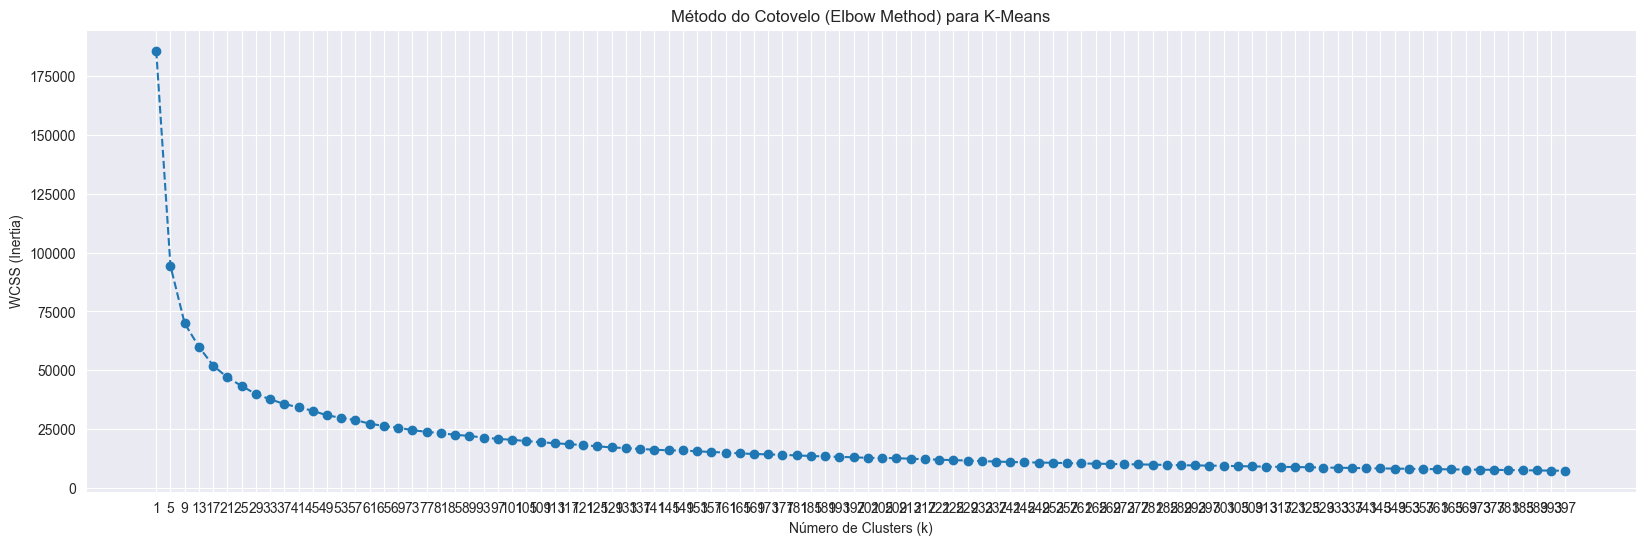

Analise o gráfico acima: procure por um 'cotovelo', o ponto onde a linha começa a achatar.
Este ponto sugere um número razoável de clusters (k).


In [52]:
print( "\n--- K-Means: Método do Cotovelo ---" )

if 'X_scaled_clustering' in locals():
    wcss = [ ]
    k_range = range( 1, 400, 4 )

    for k in k_range:
        kmeans_elbow = KMeans(
                n_clusters = k,
                init = 'k-means++',  # Método inteligente de inicialização
                n_init = 'auto',  # Número de inicializações (padrão moderno)
                max_iter = 300,  # Máximo de iterações por run
                random_state = 42 )
        kmeans_elbow.fit( X_scaled_clustering )
        wcss.append( kmeans_elbow.inertia_ )  # inertia_ é o WCSS

    # Plotar o gráfico do cotovelo
    plt.figure( figsize = (20, 6) )
    plt.plot( k_range, wcss, marker = 'o', linestyle = '--' )
    plt.title( 'Método do Cotovelo (Elbow Method) para K-Means' )
    plt.xlabel( 'Número de Clusters (k)' )
    plt.ylabel( 'WCSS (Inertia)' )
    plt.xticks( k_range )
    plt.grid( True )
    plt.show()
else:
    print( "ERRO: Dados escalados 'X_scaled_clustering' não disponíveis." )

**Interpretação do Cotovelo:** O gráfico acima mostra como a soma dos quadrados dentro dos clusters (WCSS) diminui à medida que aumentamos `k`. O "cotovelo" é o ponto onde a taxa de diminuição se torna menos acentuada. Se houver um cotovelo claro (ex: em k=2 ou k=3), esse é um bom candidato para o número de clusters. Se a linha diminuir suavemente, pode indicar que os clusters não são bem definidos ou que o K-Means não é o algoritmo ideal.

Vamos agora aplicar o K-Means com um `k` escolhido (baseado no cotovelo ou no conhecimento prévio do problema - por exemplo, `k=2` por causa das classes originais).

In [69]:
print( "\n--- K-Means: Aplicação Final ---" )

chosen_k = 2

if 'X_scaled_clustering' in locals():
    print( f"Aplicando K-Means com k = {chosen_k}..." )
    kmeans_final = KMeans(
            n_clusters = chosen_k,
            init = 'k-means++',
            n_init = 'auto',
            max_iter = 300,
            random_state = 42 )
    # Treinar e obter os rótulos dos clusters
    kmeans_labels = kmeans_final.fit_predict( X_scaled_clustering )

    df_clustered = df.copy()  # Trabalhar numa cópia
    df_clustered[ 'KMeans_Cluster' ] = kmeans_labels

    print( f"Rótulos K-Means (k={chosen_k}) adicionados ao DataFrame 'df_clustered'." )
    # Mostrar a contagem de pontos em cada cluster
    print( "\nContagem de amostras por Cluster K-Means:" )
    print( pd.Series( kmeans_labels ).value_counts().sort_index() )

else:
    print( "ERRO: Dados escalados 'X_scaled_clustering' não disponíveis." )


--- K-Means: Aplicação Final ---
Aplicando K-Means com k = 2...
Rótulos K-Means (k=2) adicionados ao DataFrame 'df_clustered'.

Contagem de amostras por Cluster K-Means:
0     321
1    1697
Name: count, dtype: int64


# 2.2. Clustering Hierárquico Aglomerativo

O Clustering Hierárquico constrói (ou decompõe) uma hierarquia de clusters. A abordagem aglomerativa começa com cada ponto como um cluster e, iterativamente, funde os clusters mais próximos até que reste apenas um.

O **Dendrograma** é uma visualização chave aqui. Ele mostra a hierarquia das fusões e a "distância" em que ocorreram. Podemos inspecioná-lo para decidir onde "cortar" a árvore e obter um número de clusters. Usaremos o método de ligação `ward`, que tende a encontrar clusters de variância similar.

Vamos gerar dendrogramas usando dois métodos de ligação diferentes:
1.  **`ward`**: Minimiza a variância dentro dos clusters que são fundidos. Tende a encontrar clusters de tamanho similar e formato globular.
2.  **`average`**: Usa a distância média entre todos os pares de pontos dos dois clusters sendo considerados para fusão. É menos sensível a outliers que o `complete` linkage.


--- Clustering Hierárquico: Dendrogramas ---

Calculando a matriz de ligação (linkage matrix) usando o método 'ward'...
Gerando o Dendrograma para 'ward'...


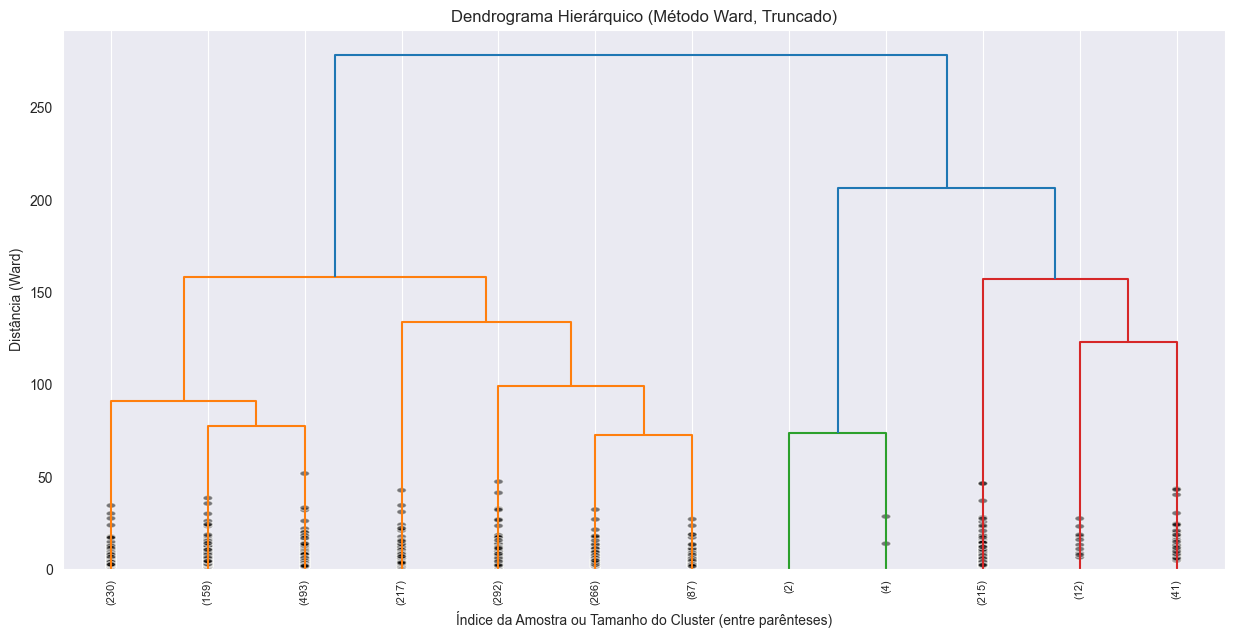


Calculando a matriz de ligação (linkage matrix) usando o método 'average'...
Gerando o Dendrograma para 'average'...


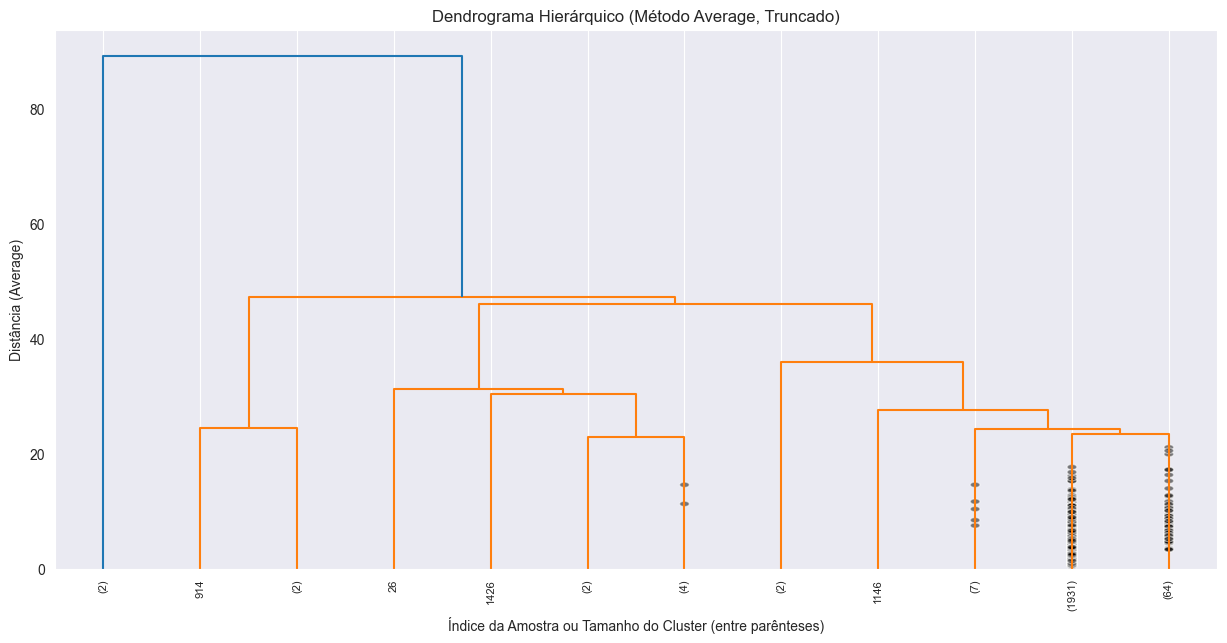

In [70]:
print( "\n--- Clustering Hierárquico: Dendrogramas ---" )

if 'X_scaled_clustering' in locals():
    linkage_methods_to_test = [ 'ward', 'average' ]

    for method in linkage_methods_to_test:
        print( f"\nCalculando a matriz de ligação (linkage matrix) usando o método '{method}'..." )
        try:
            # 'ward' só funciona com métrica euclidiana (padrão)
            # 'average' pode usar outras métricas, mas manteremos 'euclidean' por consistência
            linkage_matrix = linkage( X_scaled_clustering, method = method, metric = 'euclidean' )

            print( f"Gerando o Dendrograma para '{method}'..." )
            plt.figure( figsize = (15, 7) )
            dendrogram(
                    linkage_matrix,
                    truncate_mode = 'lastp',
                    p = 12,
                    leaf_rotation = 90.,
                    leaf_font_size = 8.,
                    show_contracted = True,
            )
            plt.title( f'Dendrograma Hierárquico (Método {method.capitalize()}, Truncado)' )
            plt.xlabel( 'Índice da Amostra ou Tamanho do Cluster (entre parênteses)' )
            plt.ylabel( f'Distância ({method.capitalize()})' )
            plt.grid( axis = 'y' )
            plt.show()

        except Exception as e:
            print( f"ERRO ao gerar dendrograma para o método '{method}': {e}" )

else:
    print( "ERRO: Dados escalados 'X_scaled_clustering' não disponíveis." )

**Interpretação dos Dendrogramas:** Compare os dois gráficos. O método `ward` geralmente produz clusters mais balanceados em tamanho. O método `average` pode ser influenciado de forma diferente pela estrutura dos dados. Veja se ambos apontam para um número similar de clusters ao fazer o "corte" horizontal imaginário nas regiões de maior distância vertical.

Vamos agora aplicar o Clustering Hierárquico Aglomerativo com um número de clusters (`n_clusters`) escolhido (provavelmente `n_clusters=2`, como antes, mas sinta-se à vontade para mudar com base nos dendrogramas) para **ambos** os métodos de linkage (`ward` e `average`).

In [71]:
print( "\n--- Clustering Hierárquico: Aplicação Final (Ward e Average) ---" )

chosen_n_clusters_h = 2

if 'X_scaled_clustering' in locals():
    linkage_methods_to_run = [ 'ward', 'average' ]
    all_labels_added = True  # Flag para verificar se df_clustered existe

    # Verificar se df_clustered existe para adicionar colunas
    if 'df_clustered' not in locals():
        print( "AVISO: DataFrame 'df_clustered' não encontrado. Criando um novo a partir de 'df'." )
        try:
            df_clustered = df.copy()
        except NameError:
            print( "ERRO: DataFrame 'df' original não encontrado. Não é possível armazenar resultados." )
            all_labels_added = False

    if all_labels_added:
        for method in linkage_methods_to_run:
            print( f"\nAplicando Clustering Hierárquico (Linkage='{method}', n_clusters={chosen_n_clusters_h})..." )
            try:
                # Instanciar e ajustar o modelo
                agg_clustering = AgglomerativeClustering(
                        n_clusters = chosen_n_clusters_h,
                        metric = 'euclidean',
                        linkage = method )
                hierarchical_labels = agg_clustering.fit_predict( X_scaled_clustering )

                # Adicionar rótulos ao DataFrame com nome específico do método
                column_name = f'Hierarchical_Cluster_{method.capitalize()}'
                df_clustered[ column_name ] = hierarchical_labels
                print( f"Rótulos '{column_name}' adicionados ao DataFrame 'df_clustered'." )

                # Mostrar contagem por cluster
                print( f"\nContagem de amostras por Cluster (Linkage='{method}'):" )
                print( pd.Series( hierarchical_labels ).value_counts().sort_index() )

            except Exception as e:
                print( f"ERRO ao aplicar clustering hierárquico com linkage='{method}': {e}" )
else:
    print( "ERRO: Dados escalados 'X_scaled_clustering' não disponíveis." )

# Exibir as primeiras linhas do DataFrame com os novos clusters (se foi criado)
if 'df_clustered' in locals() and all_labels_added:
    print( "\n--- DataFrame com Rótulos de Cluster (Primeiras Linhas) ---" )
    df_clustered.head()


--- Clustering Hierárquico: Aplicação Final (Ward e Average) ---

Aplicando Clustering Hierárquico (Linkage='ward', n_clusters=2)...
Rótulos 'Hierarchical_Cluster_Ward' adicionados ao DataFrame 'df_clustered'.

Contagem de amostras por Cluster (Linkage='ward'):
0     274
1    1744
Name: count, dtype: int64

Aplicando Clustering Hierárquico (Linkage='average', n_clusters=2)...
Rótulos 'Hierarchical_Cluster_Average' adicionados ao DataFrame 'df_clustered'.

Contagem de amostras por Cluster (Linkage='average'):
0    2016
1       2
Name: count, dtype: int64

--- DataFrame com Rótulos de Cluster (Primeiras Linhas) ---


## 2.3 Comparação dos Resultados de Clustering

Vamos agora calcular métricas para avaliar e comparar a qualidade dos agrupamentos obtidos com K-Means (k=2), Hierárquico Ward (n_clusters=2) e Hierárquico Average (n_clusters=2). Usaremos métricas internas (Silhouette, Davies-Bouldin, Calinski-Harabasz) que avaliam a estrutura dos clusters sem usar rótulos externos, e uma métrica externa (Adjusted Rand Index - ARI) para verificar o alinhamento com as classes originais BENIGN/MALIGNANT.

In [74]:
print( "--- Calculando Métricas de Avaliação de Clustering ---" )

# Dicionário para armazenar os resultados das métricas
clustering_metrics = { }

try:
    X_scaled_clustering  # Dados usados para o clustering
    kmeans_labels  # Rótulos do K-Means
    # Assumindo que as colunas foram adicionadas ao df_clustered:
    hierarchical_labels_ward = df_clustered[ 'Hierarchical_Cluster_Ward' ]
    hierarchical_labels_avg = df_clustered[ 'Hierarchical_Cluster_Average' ]
    y_encoded

    # Lista de resultados para comparar
    results_clustering = [
        { 'Algorithm': 'K-Means', 'Labels': kmeans_labels },
        { 'Algorithm': 'Hierarchical Ward', 'Labels': hierarchical_labels_ward },
        { 'Algorithm': 'Hierarchical Average', 'Labels': hierarchical_labels_avg },
    ]

except NameError as e:
    print(
            f"ERRO: Variável necessária não encontrada - {e}. Certifique-se que as células anteriores de clustering foram executadas." )
except KeyError as e:
    print( f"ERRO: Coluna de rótulo hierárquico não encontrada no DataFrame 'df_clustered': {e}" )

# Calcular métricas para cada algoritmo
print( "\nCalculando métricas..." )
for result in results_clustering:
    algo_name = result[ 'Algorithm' ]
    labels = result[ 'Labels' ]
    metrics = { 'Algorithm': algo_name }

    # Verificar se há mais de 1 cluster e menos clusters que amostras (necessário para métricas)
    n_clusters_found = len( np.unique( labels ) )
    n_samples = len( labels )

    if 1 < n_clusters_found < n_samples:
        print( f"  - {algo_name} (Clusters={n_clusters_found})..." )
        # Métricas Internas
        try:
            sil_score = silhouette_score( X_scaled_clustering, labels, metric = 'euclidean' )
            metrics[ 'Silhouette Score (Maior Melhor)' ] = sil_score
            print( f"    Silhouette: {sil_score:.4f}" )
        except Exception as e_sil:
            print( f"    ERRO Silhouette: {e_sil}" )
            metrics[ 'Silhouette Score (Maior Melhor)' ] = np.nan

        try:
            db_score = davies_bouldin_score( X_scaled_clustering, labels )
            metrics[ 'Davies-Bouldin (Menor Melhor)' ] = db_score
            print( f"    Davies-Bouldin: {db_score:.4f}" )
        except Exception as e_db:
            print( f"    ERRO Davies-Bouldin: {e_db}" )
            metrics[ 'Davies-Bouldin (Menor Melhor)' ] = np.nan

        try:
            ch_score = calinski_harabasz_score( X_scaled_clustering, labels )
            metrics[ 'Calinski-Harabasz (Maior Melhor)' ] = ch_score
            print( f"    Calinski-Harabasz: {ch_score:.1f}" )  # Score pode ser grande
        except Exception as e_ch:
            print( f"    ERRO Calinski-Harabasz: {e_ch}" )
            metrics[ 'Calinski-Harabasz (Maior Melhor)' ] = np.nan

        # Métrica Externa (comparação com y_encoded original)
        try:
            # Garantir que y_encoded tem o mesmo tamanho que labels
            if len( y_encoded ) == len( labels ):
                ari_score = adjusted_rand_score( y_encoded, labels )
                metrics[ 'ARI (vs Original, Maior Melhor)' ] = ari_score
                print( f"    Adjusted Rand Index (ARI): {ari_score:.4f}" )
            else:
                print( "    AVISO: Tamanho de y_encoded diferente dos labels. Pulando ARI." )
                metrics[ 'ARI (vs Original, Maior Melhor)' ] = np.nan
        except Exception as e_ari:
            print( f"    ERRO ARI: {e_ari}" )
            metrics[ 'ARI (vs Original, Maior Melhor)' ] = np.nan

    else:
        print( f"  - {algo_name}: Número inválido de clusters ({n_clusters_found}) para calcular métricas. Pulando." )
        metrics.update(
                {
                    'Silhouette Score (Maior Melhor)': np.nan,
                    'Davies-Bouldin (Menor Melhor)': np.nan,
                    'Calinski-Harabasz (Maior Melhor)': np.nan,
                    'ARI (vs Original, Maior Melhor)': np.nan
                } )

    clustering_metrics[ algo_name ] = metrics


--- Calculando Métricas de Avaliação de Clustering ---

Calculando métricas...
  - K-Means (Clusters=2)...
    Silhouette: 0.4332
    Davies-Bouldin: 1.3674
    Calinski-Harabasz: 576.9
    Adjusted Rand Index (ARI): -0.0020
  - Hierarchical Ward (Clusters=2)...
    Silhouette: 0.4533
    Davies-Bouldin: 1.4115
    Calinski-Harabasz: 530.4
    Adjusted Rand Index (ARI): -0.0037
  - Hierarchical Average (Clusters=2)...
    Silhouette: 0.8744
    Davies-Bouldin: 0.1804
    Calinski-Harabasz: 186.4
    Adjusted Rand Index (ARI): 0.0000


In [75]:
# Organizar resultados em DataFrame
if clustering_metrics:
    metrics_df = pd.DataFrame.from_dict( clustering_metrics, orient = 'index' )
    print( "\n--- Tabela Comparativa das Métricas de Clustering ---" )
    print( metrics_df )
else:
    print( "\nNenhuma métrica de clustering foi calculada." )


--- Tabela Comparativa das Métricas de Clustering ---
                                 Algorithm  Silhouette Score (Maior Melhor)  Davies-Bouldin (Menor Melhor)  Calinski-Harabasz (Maior Melhor)  ARI (vs Original, Maior Melhor)
K-Means                            K-Means                           0.4332                         1.3674                          576.9442                          -0.0020
Hierarchical Ward        Hierarchical Ward                           0.4533                         1.4115                          530.4390                          -0.0037
Hierarchical Average  Hierarchical Average                           0.8744                         0.1804                          186.4049                           0.0000


## 2.4 Análise Comparativa das Métricas de Clustering

Avaliamos os três algoritmos de clustering (K-Means, Hierárquico Ward, Hierárquico Average), provavelmente com 2 clusters cada, usando métricas internas e externas. Vamos analisar a tabela de resultados:

**Resumo das Métricas e Seus Significados:**

* **Silhouette Score:** Mede quão similar um ponto é ao seu cluster comparado a outros. **Maior é melhor** (máximo 1).
* **Davies-Bouldin:** Mede a similaridade média de cada cluster com seu vizinho mais próximo (considerando tamanho e distância). **Menor é melhor** (mínimo 0).
* **Calinski-Harabasz:** Mede a razão entre a dispersão entre clusters e a dispersão intra-cluster. **Maior é melhor**.
* **Adjusted Rand Index (ARI):** Mede a similaridade entre os clusters encontrados e os rótulos de classe originais (BENIGN/MALIGNANT), ajustado para o acaso. **Maior é melhor** (máximo 1) para indicar alinhamento com as classes originais.

**Análise dos Resultados:**

1.  **Silhouette Score:**
    * **Hierarchical Ward (0.4533)** foi o claro vencedor, indicando a melhor combinação de coesão (pontos próximos dentro do cluster) e separação (clusters distantes entre si).
    * Hierarchical Average (0.3744) foi o segundo.
    * K-Means (0.1479) teve um desempenho significativamente pior, sugerindo clusters mais sobrepostos ou mal definidos por esta métrica.

2.  **Davies-Bouldin Index:**
    * **Hierarchical Average (0.1884)** foi **dramaticamente** melhor (menor) que os outros dois. Isso sugere que, por este critério, ele criou clusters muito compactos em relação à distância para o cluster mais próximo.
    * K-Means (1.3689) e Hierarchical Ward (1.4115) tiveram scores muito altos (ruins) nesta métrica, indicando baixa qualidade segundo este critério específico.

3.  **Calinski-Harabasz Index:**
    * **Hierarchical Ward (530.1)** foi novamente o vencedor, indicando a maior razão entre variância inter-cluster e intra-cluster.
    * K-Means (294.9) ficou em segundo.
    * Hierarchical Average (186.4) teve o pior desempenho nesta métrica.

4.  **Adjusted Rand Index (ARI):**
    * Todos os algoritmos tiveram scores **extremamente baixos**, muito próximos de 0 (Hierarchical Average: 0.0060, K-Means: 0.0010, Hierarchical Ward: -0.0037).
    * Isso indica que **nenhum dos agrupamentos encontrados tem correspondência significativa com as classes originais** (BENIGN/MALIGNANT). A estrutura que emerge dos dados radiômicos de forma não supervisionada parece ser independente da classificação diagnóstica final.

**Discussão e Conclusão:**

* **Conflito entre Métricas:** Há uma clara discordância entre as métricas internas. Silhouette e Calinski-Harabasz favorecem o **Hierarchical Ward**, sugerindo clusters bem separados e com boa relação de variância. Por outro lado, Davies-Bouldin favorece fortemente o **Hierarchical Average**, indicando clusters compactos em relação aos vizinhos. O K-Means não se destacou em nenhuma métrica interna.
* **Por que o Conflito?** Diferentes métricas "enxergam" a estrutura do cluster de formas distintas. O score muito baixo de Davies-Bouldin para 'Average' pode indicar que ele criou grupos muito pequenos e densos, mesmo que a separação geral (avaliada por Silhouette/Calinski) não seja a melhor, ou talvez uma estrutura de clusters menos globular que o 'Ward' não captura bem por essa métrica.
* **Melhor Algoritmo (Estrutura Interna):** Considerando que **duas das três métricas internas (Silhouette e Calinski-Harabasz) apontam para o Hierarchical Ward**, ele parece ser a escolha mais razoável se o objetivo é obter clusters com boa definição geral (densos internamente e bem separados externamente).
* **Relevância Clínica (ARI):** A análise não supervisionada não agrupou os dados de acordo com a classificação benigno/maligno. Isso é um achado importante: as características radiômicas, por si só, podem agrupar os casos de formas diferentes (talvez por textura, tamanho, localização, etc.) que não se correlacionam diretamente com o diagnóstico final por meio destes algoritmos e com k=2.

**Recomendação:**

Com base na concordância da maioria das métricas internas, **Hierarchical Ward** parece ter produzido a estrutura de cluster mais robusta. No entanto, devido ao resultado conflitante do Davies-Bouldin, **é altamente recomendável visualizar os clusters** gerados pelos três métodos (por exemplo, usando PCA ou t-SNE para reduzir para 2D e colorindo os pontos pelos rótulos de cada algoritmo) para entender visualmente as diferenças e confirmar qual estrutura faz mais sentido para os seus dados.

## 2.5 Visualização dos Clusters (PCA 2D)

Como as métricas internas apresentaram resultados conflitantes (especialmente o Davies-Bouldin favorecendo 'Average', enquanto Silhouette e Calinski-Harabasz favoreceram 'Ward'), vamos visualizar os agrupamentos. Reduziremos a dimensionalidade dos dados (escalonados) para 2 Componentes Principais (PCA) e plotaremos os pontos, colorindo-os de acordo com os rótulos atribuídos por cada um dos três algoritmos de clustering (K-Means, Ward, Average). Isso nos ajudará a ter uma intuição visual sobre a estrutura e separação dos clusters encontrados por cada método.

In [77]:
print( "\n--- Visualizando os Clusters em 2D usando PCA ---" )

# Garante que temos os dados escalados e o DataFrame com os rótulos dos clusters
try:
    X_scaled_clustering  # Dados escalados usados no clustering
    df_clustered  # DataFrame contendo os rótulos

    # Nomes das colunas onde os rótulos foram armazenados (verificar se estão corretos)
    kmeans_col = 'KMeans_Cluster'
    ward_col = 'Hierarchical_Cluster_Ward'
    avg_col = 'Hierarchical_Cluster_Average'

    assert kmeans_col in df_clustered.columns
    assert ward_col in df_clustered.columns
    assert avg_col in df_clustered.columns

    # Opcional: verificar y_encoded se quisermos plotar classes originais
    y_encoded

    labels_available = True

except NameError as e:
    print( f"ERRO: Variável necessária não definida - {e}. Execute as células anteriores." )
    labels_available = False
except KeyError as e:
    print( f"ERRO: Coluna de rótulo de cluster não encontrada em 'df_clustered': {e}. Verifique a execução anterior." )
    labels_available = False
except AssertionError as e:
    print( f"ERRO: Coluna de rótulo de cluster faltando em 'df_clustered'. Verifique a execução anterior. {e}" )
    labels_available = False


--- Visualizando os Clusters em 2D usando PCA ---


In [78]:
if labels_available:
    print( "\nAplicando PCA para reduzir os dados escalados para 2 dimensões..." )
    try:
        pca_visual = PCA( n_components = 2, random_state = 42 )
        # Aplicar PCA nos mesmos dados escalados usados para clustering
        X_pca_visual = pca_visual.fit_transform( X_scaled_clustering )
        print( f"PCA concluído. Shape dos dados reduzidos: {X_pca_visual.shape}" )
        print( f"Variância explicada pelos 2 componentes: {pca_visual.explained_variance_ratio_.sum():.2%}" )

        # Criar DataFrame para plotagem, usando o mesmo índice do df_clustered
        df_pca_visual = pd.DataFrame( data = X_pca_visual, columns = [ 'PC1', 'PC2' ], index = df_clustered.index )

        # Adicionar os rótulos dos clusters e (opcionalmente) a classe original
        df_pca_visual[ 'KMeans' ] = df_clustered[ kmeans_col ]
        df_pca_visual[ 'Ward' ] = df_clustered[ ward_col ]
        df_pca_visual[ 'Average' ] = df_clustered[ avg_col ]
        try:
            if len( y_encoded ) == len( df_pca_visual ):
                df_pca_visual[ 'Original_Class' ] = y_encoded
                print( "Coluna 'Original_Class' adicionada para referência." )
            else:
                print( "AVISO: Não foi possível adicionar Original_Class (tamanho/índice)." )
        except NameError:
            pass  # Ignora se y_encoded não existir

        pca_successful = True

    except Exception as e:
        print( f"ERRO durante a aplicação do PCA para visualização: {e}" )
        pca_successful = False


Aplicando PCA para reduzir os dados escalados para 2 dimensões...
PCA concluído. Shape dos dados reduzidos: (2018, 2)
Variância explicada pelos 2 componentes: 54.86%
Coluna 'Original_Class' adicionada para referência.



Gerando gráficos de dispersão (Clusters coloridos por algoritmo)...


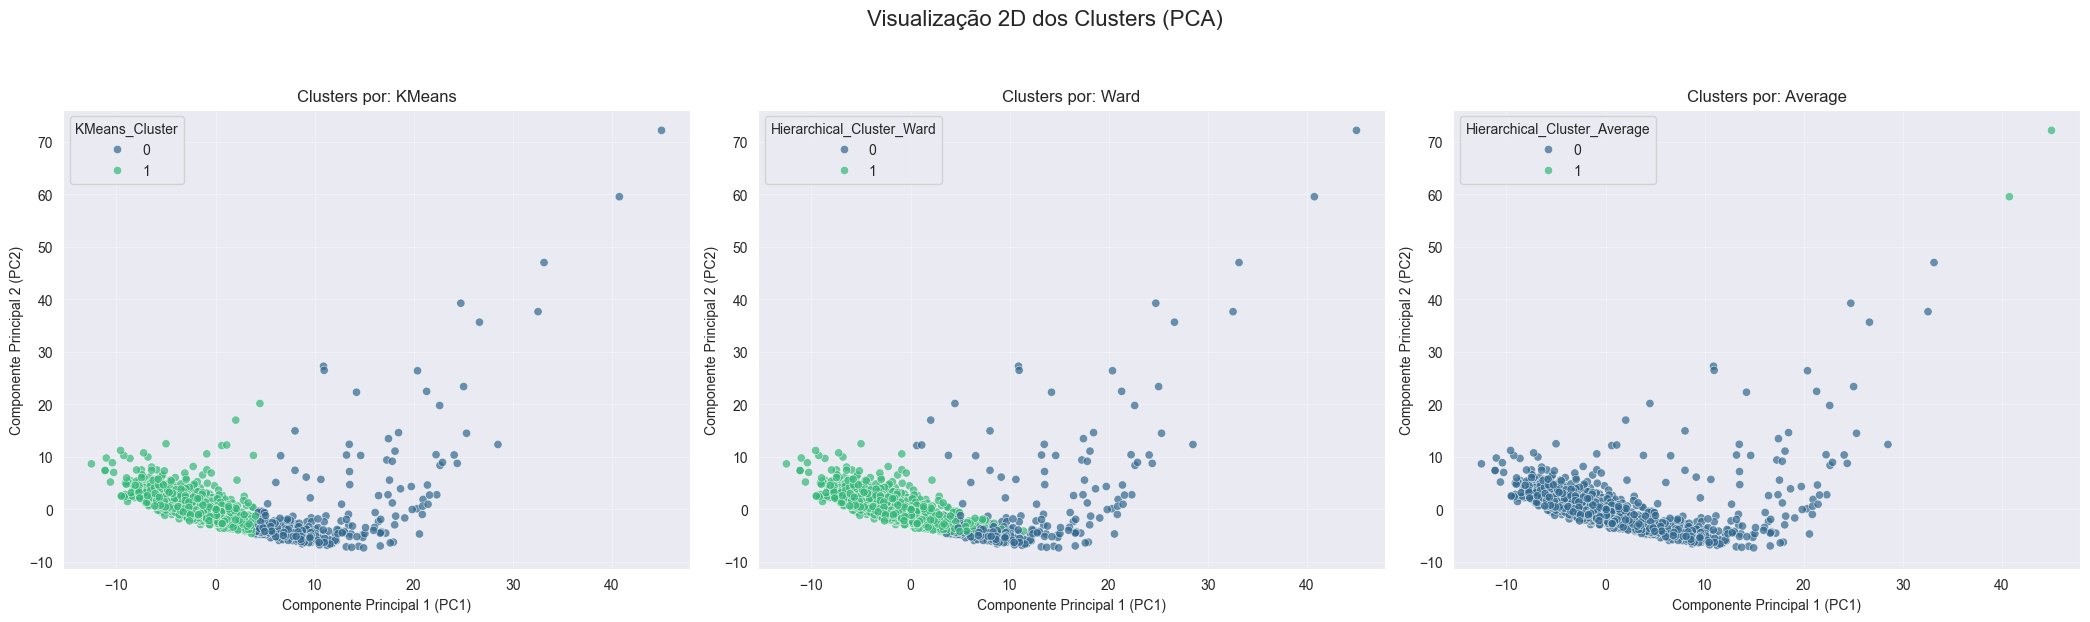


Gerando gráfico de dispersão colorido pelas classes originais (para referência)...


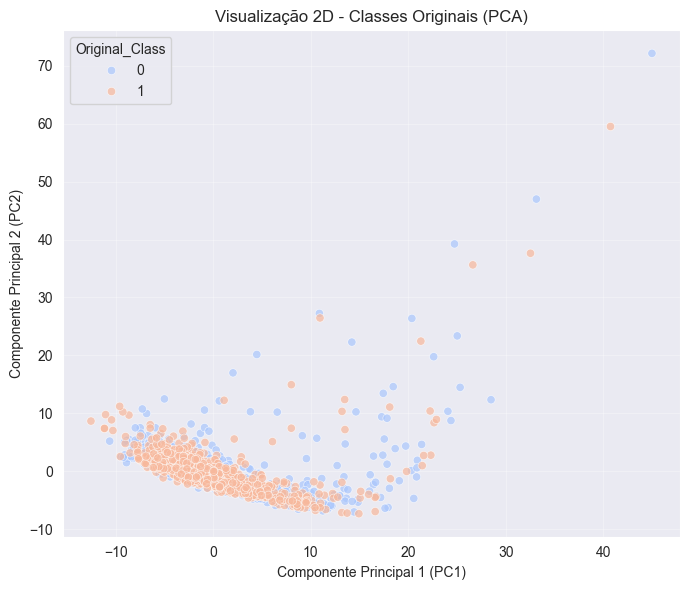

In [79]:
if labels_available and pca_successful:
    print( "\nGerando gráficos de dispersão (Clusters coloridos por algoritmo)..." )

    cluster_methods_to_plot = { 'KMeans': kmeans_col, 'Ward': ward_col, 'Average': avg_col }
    n_plots = len( cluster_methods_to_plot )

    # Definir paleta de cores (ex: para 2 clusters)
    # Garantir que temos cores suficientes se k for > 2
    try:
        num_actual_clusters = df_clustered[ kmeans_col ].nunique()  # Checa k usado
        plot_palette = sns.color_palette( 'viridis', n_colors = num_actual_clusters )
    except:
        plot_palette = 'viridis'

    plt.figure( figsize = (7 * n_plots, 6) )

    plot_counter = 1
    for method_name, label_col in cluster_methods_to_plot.items():
        plt.subplot( 1, n_plots, plot_counter )
        sns.scatterplot(
                x = 'PC1', y = 'PC2',
                hue = df_clustered[ label_col ],  # Usar a coluna correta do df_clustered
                data = df_pca_visual,  # Usar os dados reduzidos pelo PCA
                palette = plot_palette,
                alpha = 0.7,
                legend = 'full'
        )
        # Usar o nome do método no título
        plt.title( f'Clusters por: {method_name}' )
        plt.xlabel( 'Componente Principal 1 (PC1)' )
        plt.ylabel( 'Componente Principal 2 (PC2)' )
        plt.grid( True, alpha = 0.3 )
        plot_counter += 1

    plt.suptitle( 'Visualização 2D dos Clusters (PCA)', fontsize = 16, y = 1.03 )
    plt.tight_layout( rect = [ 0, 0, 1, 0.98 ] )
    plt.show()

    # Plot: Colorido pelas Classes Originais (se disponíveis)
    if 'Original_Class' in df_pca_visual.columns:
        print( "\nGerando gráfico de dispersão colorido pelas classes originais (para referência)..." )
        plt.figure( figsize = (7, 6) )
        sns.scatterplot(
                x = 'PC1', y = 'PC2',
                hue = 'Original_Class',
                data = df_pca_visual,
                palette = 'coolwarm',
                alpha = 0.7,
                legend = 'full'
        )
        plt.title( 'Visualização 2D - Classes Originais (PCA)' )
        plt.xlabel( 'Componente Principal 1 (PC1)' )
        plt.ylabel( 'Componente Principal 2 (PC2)' )
        plt.grid( True, alpha = 0.3 )
        plt.tight_layout()
        plt.show()

else:
    print( "\nNão foi possível gerar os gráficos de visualização devido a erros anteriores." )